In [3]:
import itertools as it

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import pyoz as oz

sns.set_style('whitegrid', {'xtick.major.size': 5,
                            'xtick.labelsize': 'large',
                            'ytick.major.size': 5,
                            'ytick.labelsize': 'large',
                            'axes.edgecolor': 'k',
                            'font.weight': 'bold',
                            'axes.labelsize': 'large',
})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.style.use('seaborn-colorblind')

%matplotlib inline

In [8]:
# Colloid concentration
rhos = np.arange(0.01, 0.03, 0.002)

# Depletant concentrtaion
rho_ds = np.arange(3.24, 4.5, 0.05)

sig_c = 3.0
sig_d = 0.5

converged = pd.DataFrame(index=rho_ds, columns=rhos)
converged.index.name = r'$\rho_{depl}$'
converged.columns.name = r'$\rho$'

print(len(rhos) * len(rho_ds))
for rho, rho_d in it.product(rhos, rho_ds):
    soft = oz.System()
    U = oz.soft_depletion(soft.r, eps=1, n=36, sig_c=sig_c, sig_d=sig_d, rho_d=rho_d)
    soft.set_interaction(0, 0, U)

    g_r, _, _, _ = soft.solve(rhos=rho, closure_name='kh', max_iter=1000)

    if np.isnan(g_r).all():
        converged.set_value(rho_d, rho, 0.0)
    else:
        converged.set_value(rho_d, rho, 1.0)

[INFO][2016-10-28 16:09:38,401] Initialized: <System; 1 component; rho: 0.01>
[INFO][2016-10-28 16:09:38,426] Converged in 0.02s after 28 iterations
[INFO][2016-10-28 16:09:38,451] Initialized: <System; 1 component; rho: 0.01>
[INFO][2016-10-28 16:09:38,471] Converged in 0.02s after 28 iterations
[INFO][2016-10-28 16:09:38,492] Initialized: <System; 1 component; rho: 0.01>
[INFO][2016-10-28 16:09:38,524] Converged in 0.03s after 28 iterations
[INFO][2016-10-28 16:09:38,562] Initialized: <System; 1 component; rho: 0.01>


260


[INFO][2016-10-28 16:09:38,598] Converged in 0.03s after 28 iterations
[INFO][2016-10-28 16:09:38,639] Initialized: <System; 1 component; rho: 0.01>
[INFO][2016-10-28 16:09:38,668] Converged in 0.03s after 28 iterations
[INFO][2016-10-28 16:09:38,709] Initialized: <System; 1 component; rho: 0.01>
[INFO][2016-10-28 16:09:38,738] Converged in 0.03s after 27 iterations
[INFO][2016-10-28 16:09:38,765] Initialized: <System; 1 component; rho: 0.01>
[INFO][2016-10-28 16:09:38,798] Converged in 0.03s after 27 iterations
[INFO][2016-10-28 16:09:38,820] Initialized: <System; 1 component; rho: 0.01>
[INFO][2016-10-28 16:09:38,850] Converged in 0.03s after 27 iterations
[INFO][2016-10-28 16:09:38,882] Initialized: <System; 1 component; rho: 0.01>
[INFO][2016-10-28 16:09:38,934] Converged in 0.05s after 32 iterations
[INFO][2016-10-28 16:09:38,961] Initialized: <System; 1 component; rho: 0.01>
[INFO][2016-10-28 16:09:38,982] Converged in 0.02s after 30 iterations
[INFO][2016-10-28 16:09:39,014] Ini

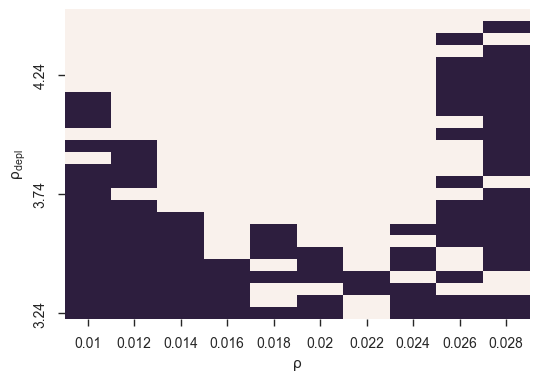

In [9]:
converged = converged[converged.columns].astype(float) 
ax = sns.heatmap(converged, vmin=0, vmax=1, cbar=False, yticklabels=10)
ax.invert_yaxis()

In [4]:
rho_2 = np.arange(0.01, 0.12, 0.01)
y2 = [9.9, 6.9, 6.0, 5.6, 5.1, 5.1, 5.2, 5.4, 5.5, 5.9, 9.9]

rho_3 = np.arange(0.008, 0.032, 0.002)
y3 = [5.5, 4.18, 3.95, 3.75, 3.72, 3.7, 3.67, 3.64, 3.63, 3.64, 4.4, 5.7]
print(len(rho_3), len(y3))

12 12


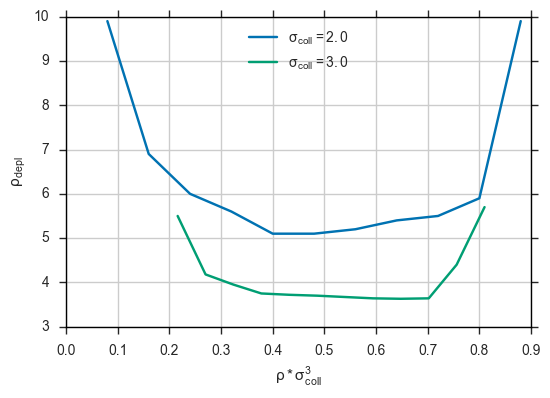

In [5]:
plt.plot(rho_2 * 2**3, y2, label=r'$\sigma_{coll} = 2.0$')
plt.plot(rho_3 * 3**3, y3, label=r'$\sigma_{coll} = 3.0$')
plt.xlabel(r'$\rho * \sigma_{coll}^3$')
plt.ylabel(r'$\rho_{depl}$')
plt.legend(loc='upper center')
plt.savefig('big_small.pdf', bbox_inches='tight')